In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = '--'
CONSUMER_SECRET = '--'

# Access:
ACCESS_TOKEN  = '--'
ACCESS_SECRET = '--'


In [60]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api


In [61]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
SearchName=input("Enter the username of twitter  user  - ")
tweets = extractor.user_timeline(screen_name="@"+SearchName, count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:10]:
    print(tweet.text)
    print()


Enter the username of twitter  user  - narendramodi
Number of tweets extracted: 200.

5 recent tweets:

Delighted to meet His Highness Sheikh Abdullah bin Zayed Al Nahyan, Minister of Foreign Affairs and International C… https://t.co/4mzalQOlVG

President Danny Antoine Rollen Faure and I had productive discussions on deepening partnership between India and Se… https://t.co/tepSjq5Bx5

Shri @arunjaitley writes about the dark days of the Emergency, the trampling of personal liberties, excesses commit… https://t.co/YR8bL6TI4N

A proud moment for Bahadurgarh, the Gateway to Haryana, as this vibrant town comes on Delhi’s Metro Map. This will… https://t.co/49GXesfgym

A caller asked me about my upcoming visit to Maghar in Uttar Pradesh’s Sant Kabir Nagar district and about the nobl… https://t.co/av7qHZncmJ

Next year we mark the 550th Prakash Utsav of the venerable Guru Nanak Dev Ji. I urge you all to share ideas on how… https://t.co/L463XKGwV2

A profound thinker, educationist, administrato

In [62]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))


,Tweets
0,Delighted to meet His Highness Sheikh Abdullah...
1,President Danny Antoine Rollen Faure and I had...
2,Shri @arunjaitley writes about the dark days o...
3,"A proud moment for Bahadurgarh, the Gateway to..."
4,A caller asked me about my upcoming visit to M...
5,Next year we mark the 550th Prakash Utsav of t...
6,"A profound thinker, educationist, administrato..."
7,"I applaud these youngsters from Bengaluru, who..."
8,"On 1st July, we mark one year of the GST. \n\n..."
9,The fraternity of doctors is special. During #...


In [64]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))



In [65]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)


1011286542927589376
2018-06-25 16:34:35
Twitter Web Client
3155
646
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/4mzalQOlVG', 'expanded_url': 'https://twitter.com/i/web/status/1011286542927589376', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [66]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
# Display of first 10 elements from dataframe:
display(data.head(200))


,Tweets,len,ID,Date,Source,Likes,RTs
0,Delighted to meet His Highness Sheikh Abdullah...,140,1011286542927589376,2018-06-25 16:34:35,Twitter Web Client,3155,646
1,President Danny Antoine Rollen Faure and I had...,140,1011285986620235777,2018-06-25 16:32:22,Twitter Web Client,2344,556
2,Shri @arunjaitley writes about the dark days o...,140,1011209508528447488,2018-06-25 11:28:28,Twitter Web Client,12249,3848
3,"A proud moment for Bahadurgarh, the Gateway to...",139,1010915511889203202,2018-06-24 16:00:14,Twitter Web Client,15409,2935
4,A caller asked me about my upcoming visit to M...,140,1010840218235232256,2018-06-24 11:01:03,Twitter Web Client,7185,1638
5,Next year we mark the 550th Prakash Utsav of t...,139,1010839920016089088,2018-06-24 10:59:52,Twitter Web Client,6247,1625
6,"A profound thinker, educationist, administrato...",140,1010839417014116352,2018-06-24 10:57:52,Twitter Web Client,5665,1536
7,"I applaud these youngsters from Bengaluru, who...",133,1010839157651001344,2018-06-24 10:56:50,Twitter Web Client,4630,1185
8,"On 1st July, we mark one year of the GST. \n\n...",140,1010839000368762881,2018-06-24 10:56:12,Twitter Web Client,7966,1990
9,The fraternity of doctors is special. During #...,140,1010838735842369537,2018-06-24 10:55:09,Twitter Web Client,4286,1195


In [67]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))



The lenght's average in tweets: 131.93


In [68]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
Here are moments from my morning exercises. Apart from Yoga, I walk on a track inspired by the Panchtatvas or 5 ele… https://t.co/TLtqWb1oey
Number of likes: 95789
140 characters.

The tweet with more retweets is: 
Here are moments from my morning exercises. Apart from Yoga, I walk on a track inspired by the Panchtatvas or 5 ele… https://t.co/TLtqWb1oey
Number of retweets: 27653
140 characters.



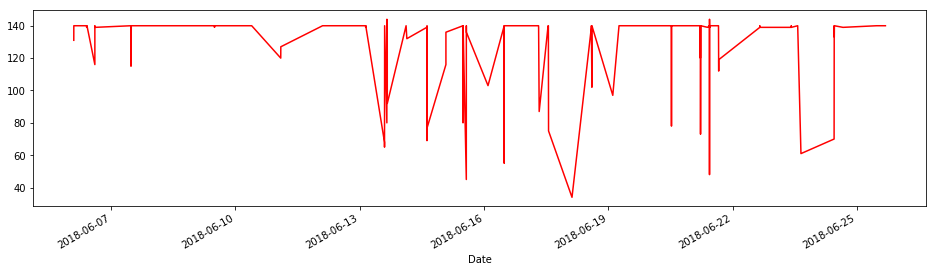

In [69]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');


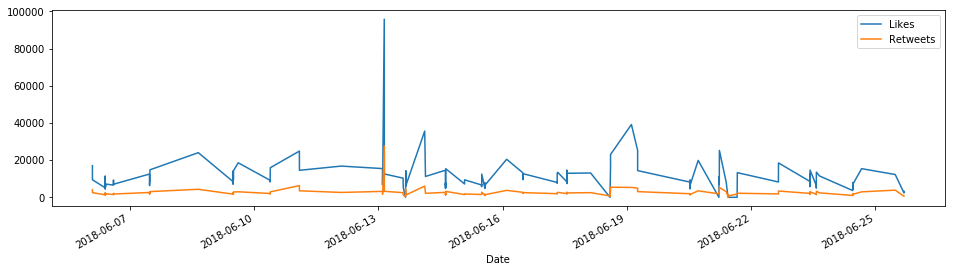

In [70]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);


In [71]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))


Creation of content sources:
* Twitter Web Client
* Twitter for Android
* Media Studio
* Twitter for iPhone


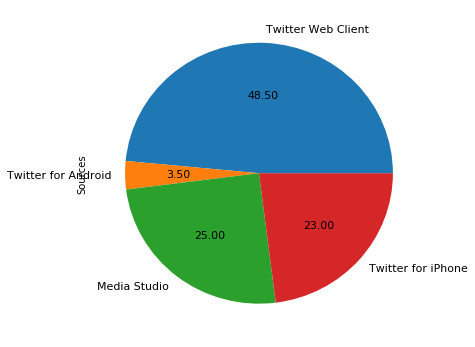

In [72]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));


In [73]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(200))


,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Delighted to meet His Highness Sheikh Abdullah...,140,1011286542927589376,2018-06-25 16:34:35,Twitter Web Client,3155,646,1
1,President Danny Antoine Rollen Faure and I had...,140,1011285986620235777,2018-06-25 16:32:22,Twitter Web Client,2344,556,0
2,Shri @arunjaitley writes about the dark days o...,140,1011209508528447488,2018-06-25 11:28:28,Twitter Web Client,12249,3848,-1
3,"A proud moment for Bahadurgarh, the Gateway to...",139,1010915511889203202,2018-06-24 16:00:14,Twitter Web Client,15409,2935,1
4,A caller asked me about my upcoming visit to M...,140,1010840218235232256,2018-06-24 11:01:03,Twitter Web Client,7185,1638,0
5,Next year we mark the 550th Prakash Utsav of t...,139,1010839920016089088,2018-06-24 10:59:52,Twitter Web Client,6247,1625,0
6,"A profound thinker, educationist, administrato...",140,1010839417014116352,2018-06-24 10:57:52,Twitter Web Client,5665,1536,1
7,"I applaud these youngsters from Bengaluru, who...",133,1010839157651001344,2018-06-24 10:56:50,Twitter Web Client,4630,1185,1
8,"On 1st July, we mark one year of the GST. \n\n...",140,1010839000368762881,2018-06-24 10:56:12,Twitter Web Client,7966,1990,0
9,The fraternity of doctors is special. During #...,140,1010838735842369537,2018-06-24 10:55:09,Twitter Web Client,4286,1195,1


In [74]:
# Analysing the Results
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]
# We print percentages:
pos_Percent=len(pos_tweets)/len(data['Tweets'])*100
neu_Percent=len(neu_tweets)/len(data['Tweets'])*100
neg_Percent=len(neg_tweets)/len(data['Tweets'])*100

print("Percentage of positive tweets: "+str(pos_Percent)+"%")
print("Percentage of neutral tweets:  "+str(neu_Percent)+"%")
print("Percentage de negative tweets: "+str(neg_Percent)+"%")


Percentage of positive tweets: 47.0%
Percentage of neutral tweets:  50.0%
Percentage de negative tweets: 3.0%
